# **A. Latar Belakang**<br>

Dalam era digital saat ini, platform transportasi online seperti MAXIM telah menjadi bagian dari kehidupan masyarakat. Platform-platform ini tidak hanya menyediakan layanan transportasi, tetapi juga menjadi wadah bagi pengguna untuk memberikan umpan balik melalui ulasan. Ulasan-ulasan yang dipublikasikan di platform seperti Google Play Store ini menjadi cerminan langsung dari kepuasan dan pengalaman pengguna dalam menggunakan layanan MAXIM. Dengan volume data ulasan yang terus meningkat, analisis sentimen menjadi semakin krusial. Melalui analisis ini, kita dapat menggali lebih dalam mengenai persepsi pengguna terhadap berbagai aspek layanan MAXIM, mulai dari kualitas pengemudi, ketepatan waktu, hingga fitur-fitur yang ditawarkan.

Tujuan utama dari analisis sentimen dalam konteks ini adalah untuk memperoleh pemahaman yang komprehensif tentang apa yang diinginkan dan tidak diinginkan oleh pengguna layanan MAXIM. Dengan demikian, perusahaan dapat mengidentifikasi area-area yang perlu diperbaiki dan mengambil langkah-langkah strategis untuk meningkatkan kualitas layanan. Selain itu, analisis sentimen juga dapat membantu perusahaan dalam membuat keputusan bisnis yang lebih baik, seperti pengembangan fitur baru, optimasi alur pemesanan, atau penyesuaian strategi pemasaran. Dengan kata lain, analisis sentimen berfungsi sebagai alat yang sangat berharga untuk memahami suara pelanggan dan memastikan bahwa layanan MAXIM terus relevan dan memenuhi kebutuhan pengguna.

# **B. Permasalahan**<br>

1. Jumlah ulasan yang besar: Volume ulasan yang terus bertambah membuat analisis manual menjadi tidak efisien dan rentan terhadap kesalahan.
2. Variasi bahasa dan gaya penulisan: Ulasan pengguna memiliki variasi yang luas dalam hal bahasa, gaya penulisan, dan tingkat formalitas.
3. Identifikasi sentimen yang kompleks: Sentimen pengguna tidak selalu eksplisit dan seringkali tersirat dalam kalimat.
4. Mengambil keputusan berdasarkan data yang akurat: Membutuhkan metode analisis yang tepat untuk mengklasifikasikan sentimen dengan benar.

# **C. Pemangku Kepentingan (Stakeholders)**<br>

1. Tim manajemen MAXIM: Membutuhkan data untuk mengambil keputusan strategis dan meningkatkan kualitas layanan.
2. Tim produk MAXIM: Membutuhkan umpan balik pengguna untuk mengembangkan fitur baru dan memperbaiki yang sudah ada.
3. Tim layanan pelanggan MAXIM: Membutuhkan informasi tentang masalah yang sering dikeluhkan pengguna.
4. Pengguna MAXIM: Secara tidak langsung, hasil analisis ini akan berdampak pada kualitas layanan yang mereka terima.

# **D. Tujuan**<br>

Tujuan dari studi kasus ini adalah untuk melakukan analisis sentimen terhadap ulasan pengguna aplikasi Maxim di Google Play Store guna:

1. Membangun model analisis sentimen: Mengembangkan model yang dapat mengklasifikasikan ulasan pengguna menjadi sentimen positif, negatif, atau netral.
2. Mengekstrak topik utama: Mengidentifikasi topik-topik utama yang sering muncul dalam ulasan pengguna.
3. Memberikan rekomendasi: Memberikan rekomendasi konkret kepada tim MAXIM berdasarkan hasil analisis.

# **E. Library dan Data**

In [1]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


In [47]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# library preprocessing text
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# library eksplorasi label
from wordcloud import WordCloud

# library data splitting dan ekstraksi fitur
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# library untuk modeling
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# library untuk menyimpan model
import joblib

import warnings

warnings.filterwarnings('ignore')

In [3]:
# load data

ulasan_maxim = pd.read_csv('ulasan_maxim.csv', encoding='utf-8')
ulasan_maxim.head(3)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,bb879dc6-775d-4ea0-a16d-5a8cc2f7a917,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"lemot banget , map/gps jg sulit dipahami , keb...",2,6,3.16.2,2024-07-21 20:25:22,Kami mohon maaf atas ketidaknyamanan yang Anda...,2024-07-22 04:14:08,3.16.2
1,5b413c1a-54f6-40f6-a9a6-fa18ece12514,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,App Maxim kenapa jadi jelek banget ya!!! Mau o...,1,18,3.16.2,2024-07-20 10:27:29,Mohon maaf atas ketidaknyamanan ini. Kami seda...,2024-07-22 04:26:54,3.16.2
2,03bea7bc-1523-43f8-a893-d364b1edeed3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sengaja aku kasih bintang full biar puas kekur...,5,42,3.16.2,2024-07-21 04:18:47,Ulasan Anda membuat hari kami lebih baik! Teri...,2024-07-22 03:19:15,3.16.2


**Informasi Kolom:**

- `reviewId`: ID unik untuk setiap ulasan.
- `userName`: Nama pengguna yang memberikan ulasan.
- `userImage`: URL gambar profil pengguna.
- `content`: Isi teks dari ulasan.
- `score`: Peringkat bintang yang diberikan oleh pengguna (misalnya, 1 hingga 5).
- `thumbsUpCount`: Jumlah pengguna lain yang menyukai ulasan tersebut.
- `reviewCreatedVersion`: Versi aplikasi Maxim saat ulasan dibuat.
- `at`: Waktu pembuatan ulasan.
- `replyContent`: Balasan dari Maxim (jika ada) terhadap ulasan tersebut.
- `repliedAt`: Waktu balasan dari Maxim (jika ada).
- `ppVersion`: Versi aplikasi Maxim saat balasan dibuat (jika ada).

In [4]:
# cek informasi dalam dataset

ulasan_maxim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              25000 non-null  object
 1   userName              25000 non-null  object
 2   userImage             25000 non-null  object
 3   content               25000 non-null  object
 4   score                 25000 non-null  int64 
 5   thumbsUpCount         25000 non-null  int64 
 6   reviewCreatedVersion  21741 non-null  object
 7   at                    25000 non-null  object
 8   replyContent          17331 non-null  object
 9   repliedAt             17331 non-null  object
 10  appVersion            21741 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.1+ MB


# **F. Clean Data**

## **1. Missing Value**

In [5]:
# cek missing value dalam persen

ulasan_maxim.isnull().sum()/len(ulasan_maxim)*100

reviewId                 0.000
userName                 0.000
userImage                0.000
content                  0.000
score                    0.000
thumbsUpCount            0.000
reviewCreatedVersion    13.036
at                       0.000
replyContent            30.676
repliedAt               30.676
appVersion              13.036
dtype: float64

In [6]:
# menghapus missing value berdasarkan kolom yang mengandung missing value

ulasan_maxim = ulasan_maxim.dropna()
ulasan_maxim.isnull().sum()

reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
replyContent            0
repliedAt               0
appVersion              0
dtype: int64

## **2. Duplicate Data**

In [7]:
# cek duplikat data
ulasan_maxim.duplicated().sum()

0

Output di atas menunjukkan bahwa tidak ada duplikasi data dalam dataset ini.

## **3. Data Type**

In [8]:
# cek data type

ulasan_maxim.dtypes

reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
appVersion              object
dtype: object

Output di atas menunjukkan bahwa kolom `at` dan `repliedAt` memiliki tipe data object, sehingga perlu diubah ke datetime.

In [9]:
# ubah at dan repliedAt ke datetime

ulasan_maxim['at'] = pd.to_datetime(ulasan_maxim['at'])
ulasan_maxim['repliedAt'] = pd.to_datetime(ulasan_maxim['repliedAt'])

In [10]:
ulasan_maxim.dtypes

reviewId                        object
userName                        object
userImage                       object
content                         object
score                            int64
thumbsUpCount                    int64
reviewCreatedVersion            object
at                      datetime64[ns]
replyContent                    object
repliedAt               datetime64[ns]
appVersion                      object
dtype: object

## **4. Drop Whitespace**

In [11]:
# menghapus whitespace di awal dan akhir value variabel dengan tipe data object

for col in ulasan_maxim.select_dtypes(include='object'):
    ulasan_maxim[col] = ulasan_maxim[col].str.strip()

# **G. Preprocessing Text**

In [12]:
# Fungsi untuk pra-pemrosesan teks
nltk.download('stopwords') # Download stopwords untuk Bahasa Indonesia
nltk.download('punkt') # Download tokenization untuk Bahasa Indonesia
stop_words = set(stopwords.words('indonesian')) # Inisialisasi stopwords
factory = StemmerFactory() # Inisialisasi stemmer
stemmer = factory.create_stemmer() # Inisialisasi stemmer

def cleaningText(text):
    text = re.sub(r'@\w+', '', text)  # Menghapus mention
    text = re.sub(r'#\w+', '', text)  # Menghapus hashtag
    text = re.sub(r'RT\s+', '', text)  # Menghapus RT
    text = re.sub(r'http\S+', '', text)  # Menghapus link
    text = re.sub(r'\d+', '', text)  # Menghapus angka
    text = re.sub(r'[^\w\s]', '', text)  # Menghapus tanda baca
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # Menghapus tanda baca
    text = text.replace('\n', ' ')  # Mengganti newline dengan spasi
    text = text.strip()  # Menghapus spasi ekstra pada awal dan akhir teks
    return text

def casefoldingText(text):
    return text.lower()  # Mengonversi teks menjadi huruf kecil

def tokenizingText(text):
    return word_tokenize(text)  # Memecah teks menjadi token

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in text] # Changed line

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text


slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal" , "…": ""}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

def toSentence(list_words):
    return ''.join(list_words)  # Menggabungkan token menjadi kalimat

def preprocess_text(text):
    text = cleaningText(text)
    text = casefoldingText(text)
    text = tokenizingText(text)
    text = filteringText(text)
    text = stemmingText(text)
    text = fix_slangwords(text)
    return toSentence(text)  # Mengembalikan kalimat yang telah melalui pra-premrosesan teks

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
# Menerapkan pra-pemrosesan pada kolom 'content'
ulasan_maxim['processed_content'] = ulasan_maxim['content'].apply(preprocess_text)

# Menampilkan hasil pra-pemrosesan
print(ulasan_maxim['processed_content'])

0        lot banget mapgps jg sulit paham banyak tunjuk...
1        app maxim jelek banget order muat ulang uninst...
2        sengaja kasih bintang full biar puas kekuranga...
3        map maxim amburadul tau titik tepat diinput na...
4        baharu peta titik point peta sinkron google ma...
                               ...                        
24993                              aplikasi yg bantu ribet
24996    aplikasi lelet susah cari driver murah sich lelet
24997        aplikasi transport tanggung untung aja kecewa
24998    tolong order talang driver ambil diab lalang d...
24999                                      drivernya ramah
Name: processed_content, Length: 15597, dtype: object


# **H. Pelabelan**

In [14]:
# Lexicon
positif_lexicon_maxim = {
    'pelayanan': {'ramah': 3, 'sopan': 3, 'membantu': 3, 'responsif': 4, 'profesional': 4, 'sigap': 3, 'tanggap': 3},
    'pengemudi': {'baik': 3, 'ramah': 3, 'sopan': 3, 'berpengalaman': 3, 'aman': 4, 'hati-hati': 3, 'sabar': 3, 'informatif': 3, 'rajin': 3},
    'aplikasi': {'mudah digunakan': 4, 'user-friendly': 4, 'lancar': 3, 'cepat': 4, 'akurat': 4, 'stabil': 3, 'fitur lengkap': 4, 'intuitif': 4},
    'harga': {'terjangkau': 4, 'murah': 4, 'sesuai': 3, 'hemat': 4, 'kompetitif': 3, 'ekonomis': 3},
    'kendaraan': {'bersih': 3, 'nyaman': 4, 'baru': 3, 'wangi': 3, 'dingin': 3, 'luas': 3, 'terawat': 3},
    'pengalaman': {'menyenangkan': 4, 'puas': 4, 'memuaskan': 4, 'terbaik': 5, 'luar biasa': 5, 'tidak mengecewakan': 4, 'sesuai harapan': 3, 'fantastis': 5},
    'pembayaran': {'mudah bayar': 4, 'cepat transfer': 3, 'aman transaksi': 4},
    'pengantaran': {'cepat sampai': 4, 'tepat waktu': 4, 'pesanan lengkap': 3},
    'promosi': {'hemat': 4, 'murah': 4, 'untung': 3, 'cuan': 3, 'banyak promo': 3, 'diskon menarik': 4, 'voucher gratis': 4},
    'maxim mart': {'lengkap': 4, 'mudah belanja': 4, 'harga terjangkau': 4, 'barang berkualitas': 4, 'pengiriman cepat': 4, 'banyak pilihan': 3},
    'maxim food': {'enak': 4, 'lezat': 4, 'porsi banyak': 3, 'harga murah': 4, 'pengiriman cepat': 4, 'pengemasan rapi': 3},
    'maxim express': {'pengiriman cepat': 4, 'aman': 4, 'terjangkau': 3, 'mudah dilacak': 3},
    'maxim taxi': {'nyaman': 4, 'bersih': 3, 'sopir ramah': 3, 'tarif terjangkau': 4},
    'pengalaman pengguna': {'mudah': 4, 'cepat': 4, 'efisien': 4, 'lancar': 3, 'tidak ribet': 3},
    'nilai tambah': {'bonus': 4, 'poin': 3, 'hadiah': 4, 'cashback': 4},
    'perbandingan': {'lebih baik': 4, 'lebih suka': 4, 'lebih nyaman': 4},
    'ketergantungan': {'tidak bisa lepas': 4, 'selalu pakai': 4},
    'emosi positif': {'senang': 4, 'gembira': 4, 'bahagia': 4, 'puas': 4, 'kagum': 4, 'takjub': 4, 'terkesan': 4, 'tenang': 3, 'santai': 3, 'nyaman': 3},
    'intensifier': {'sangat': 1.5, 'banget': 1.5, 'sekali': 1.5},
    'pengalaman': {'nyaman': 4, 'santai': 3, 'menyenangkan': 4, 'puas': 4, 'senang': 4, 'bahagia': 4, 'mudah': 4, 'gampang': 4, 'lancar': 3},
    'fitur': {'fleksibel': 3, 'luwes': 3, 'sesuai kebutuhan': 3, 'bisa disesuaikan': 3, 'personalisasi': 4, 'inovatif': 4, 'terbaru': 3, 'canggih': 4},
    'pelanggan': {'ramah': 3, 'bersahabat': 3, 'hangat': 3, 'responsif': 4, 'cepat tanggap': 4, 'sigap': 3, 'peduli': 3, 'perhatian': 3, 'empati': 3},
    'nilai tambah': {'menguntungkan': 4, 'menghemat': 4, 'hemat biaya': 3, 'bermanfaat': 4, 'berguna': 3, 'membantu': 3, 'menarik': 4, 'menarik perhatian': 3},
    'kecepatan': {'cepat': 4, 'kilat': 4, 'secepat kilat': 4, 'efisien': 4, 'efektif': 4, 'produktif': 4, 'tepat waktu': 4, 'tidak molor': 3},
    'kualitas': {'bagus': 4, 'baik': 3, 'berkualitas': 4, 'istimewa': 4, 'spesial': 4, 'unik': 4, 'sempurna': 5, 'ideal': 4},
    'kepercayaan': {'terpercaya': 4, 'dapat diandalkan': 4, 'aman': 4, 'terjamin': 4, 'nyaman': 4, 'tenang': 3}
}

negatif_lexicon_maxim = {
    'pelayanan': {'lambat': 3, 'tidak ramah': 3, 'kurang sopan': 3, 'tidak responsif': 4, 'tidak profesional': 4},
    'pengemudi': {'kasar': 4, 'tidak sopan': 3, 'tidak ramah': 3, 'membahayakan': 4, 'kurang berpengalaman': 3},
    'aplikasi': {'error': 4, 'crash': 4, 'lambat': 3, 'sulit digunakan': 4, 'tidak akurat': 4, 'tidak stabil': 3, 'fitur kurang': 3},
    'harga': {'mahal': 4, 'tidak sesuai': 3, 'terlalu mahal': 4},
    'kendaraan': {'kotor': 3, 'tidak nyaman': 4, 'rusak': 4},
    'pengalaman': {'mengecewakan': 4, 'buruk': 4, 'tidak puas': 4, 'marah': 4},
    'pembayaran': {'sulit bayar': 3, 'tidak aman': 4, 'terjadi kesalahan': 4},
    'pengantaran': {'terlambat': 4, 'pesanan salah': 4, 'barang hilang': 4},
    'promosi': {'sulit dipahami': 3, 'tidak jelas': 3, 'menyesatkan': 4},
    'maxim mart': {'barang rusak': 4, 'barang tidak sesuai': 3, 'pengiriman lama': 3},
    'maxim food': {'tidak enak': 4, 'dingin': 3, 'kurang bersih': 3},
    'maxim express': {'barang hilang': 4, 'barang rusak': 4},
    'maxim taxi': {'meteran ngawur': 4, 'jalan memutar': 3},
    'pengalaman pengguna': {'ribet': 3, 'bingung': 3},
    'nilai tambah': {'tidak ada bonus': 3, 'poin susah didapat': 3},
    'emosi negatif': {'marah': 4, 'kesal': 3, 'sedih': 3, 'kecewa': 4},
    'intensifier': {'sangat': 1.5, 'banget': 1.5, 'sekali': 1.5},
    'pengalaman': {'kecewa': 4, 'tidak puas': 4, 'frustasi': 4, 'kesal': 4, 'buang-buang waktu': 3, 'lama sekali': 3, 'tidak efisien': 3, 'rugi': 3, 'merugi': 3, 'dirugikan': 3},
    'teknis': {'eror': 4, 'crash': 4, 'down': 4, 'gangguan jaringan': 3, 'bug': 4, 'glitch': 4, 'koneksi lemot': 3, 'sinyal buruk': 3, 'tidak bisa konek': 3},
    'pelanggan': {'tidak direspons': 4, 'tidak ditanggapi': 4, 'diabaikan': 4, 'tidak profesional': 4, 'tidak sopan': 3, 'kasar': 4, 'tidak jelas': 3, 'membingungkan': 3, 'menyesatkan': 4},
    'biaya': {'mahal': 4, 'terlalu mahal': 4, 'tidak terjangkau': 3, 'biaya tambahan': 3, 'biaya tersembunyi': 3},
    'keamanan': {'tidak aman': 4, 'bahaya': 4, 'riskan': 3, 'khawatir': 3, 'takut': 3, 'was-was': 3},
    'pengemudi': {'mengemudi ugal-ugalan': 4, 'ngebut': 3, 'zig-zag': 3, 'jalan pintas': 3, 'tidak sesuai rute': 3}
}

In [15]:
# Melabeli data berdasarkan lexicon

def label_sentiment(text):
    words = text.split()
    score_pos = 0
    score_neg = 0

    for word in words:
        for category, lexicon in positif_lexicon_maxim.items():
            if word in lexicon:
                score_pos += lexicon[word]
        for category, lexicon in negatif_lexicon_maxim.items():
            if word in lexicon:
                score_neg += lexicon[word]

    if score_pos > score_neg:
        return 'Positif'
    elif score_neg > score_pos:
        return 'Negatif'
    else:
        return 'Netral'

In [16]:
# Menerapkan fungsi pelabelan pada kolom 'processed_content'
ulasan_maxim['sentiment'] = ulasan_maxim['processed_content'].apply(label_sentiment)

# Menampilkan hasil pelabelan
print(ulasan_maxim['sentiment'])

0        Positif
1         Netral
2        Positif
3        Positif
4        Positif
          ...   
24993    Negatif
24996    Positif
24997    Negatif
24998     Netral
24999    Positif
Name: sentiment, Length: 15597, dtype: object


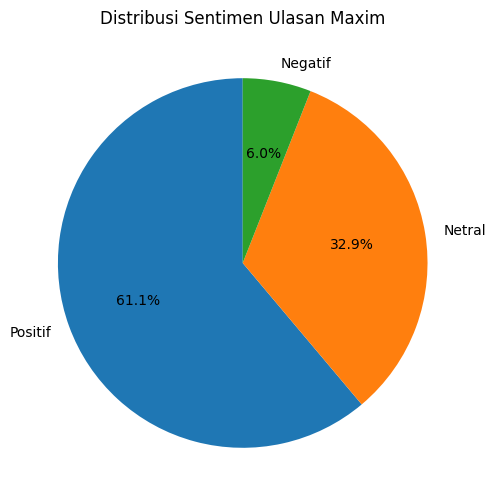

In [17]:
# Menghitung jumlah setiap sentimen
sentiment_counts = ulasan_maxim['sentiment'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Sentimen Ulasan Maxim')

# Menampilkan pie chart
plt.show()

**Interpretasi Distribusi Sentimen Pelanggan Maxim**

1. Berdasarkan pie plot yang ditampilkan, dapat disimpulkan bahwa mayoritas ulasan pengguna Maxim di Google Play Store memiliki sentimen positif (61.1%). Hal ini menunjukkan bahwa sebagian besar pengguna merasa puas dengan layanan yang diberikan oleh Maxim.
2. Sebanyak 32.9% ulasan memiliki sentimen netral, yang mengindikasikan bahwa pengalaman pengguna dengan Maxim tidak terlalu positif maupun negatif. Ulasan-ulasan ini mungkin berisi informasi yang kurang spesifik atau hanya memberikan deskripsi umum tentang layanan Maxim.
3. Sementara itu, hanya 6% ulasan yang memiliki sentimen negatif. Meskipun persentasenya kecil, ulasan-ulasan ini tetap perlu diperhatikan karena memberikan wawasan tentang area-area yang perlu ditingkatkan oleh Maxim.
4. Secara keseluruhan, hasil analisis sentimen ini menunjukkan bahwa Maxim telah berhasil memberikan layanan yang memuaskan bagi sebagian besar penggunanya.
Namun, masih terdapat ruang untuk perbaikan agar dapat memenuhi kebutuhan dan harapan semua pengguna.

# **I. Eksplorasi Label**

## **1. Word Cloud Ulasan Positif**

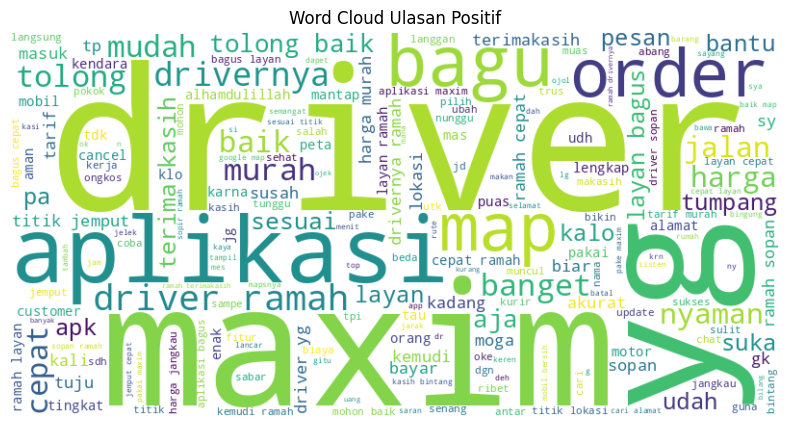

In [18]:
# Gabungkan semua teks ulasan positif
positive_text = ' '.join(ulasan_maxim[ulasan_maxim['sentiment'] == 'Positif']['processed_content'])

# Buat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Ulasan Positif')
plt.show()

**Interpretasi Word Cloud Ulasan Positif**

Kata-kata yang sering muncul dalam word cloud ulasan positif memberikan gambaran tentang aspek-aspek yang paling dihargai oleh pengguna Maxim.

**1. Harga:**
- Kata "sesuai" dan "murah" menunjukkan bahwa pengguna merasa harga yang ditawarkan oleh Maxim kompetitif dan terjangkau. Ini merupakan faktor penting dalam menarik dan mempertahankan pelanggan, terutama di pasar yang sensitif terhadap harga.

**2. Kecepatan dan Kemudahan:**
- Kata "cepat" dan "mudah" mencerminkan efisiensi layanan Maxim, baik dalam hal pemesanan, waktu tunggu, maupun proses pembayaran. Pengguna menghargai pengalaman yang lancar dan tidak ribet.

**3. Pelayanan:**
- Kata "baik", "ramah", "sopan", dan "layan bagus" menunjukkan bahwa pengguna merasa puas dengan interaksi mereka dengan pengemudi Maxim. Keramahan dan profesionalisme pengemudi berkontribusi besar terhadap pengalaman positif pelanggan.

**4. Kepuasan Umum:**
- Kata "suka", "puas", dan "terimakasih" mengungkapkan tingkat kepuasan yang tinggi terhadap layanan Maxim secara keseluruhan. Ulasan-ulasan ini menunjukkan bahwa Maxim berhasil memenuhi harapan pengguna dan memberikan pengalaman yang positif.

**Kesimpulan:**
- Word cloud ulasan positif menunjukkan bahwa Maxim telah berhasil membangun reputasi sebagai penyedia layanan transportasi yang terjangkau, cepat, mudah digunakan, dan didukung oleh pengemudi yang ramah dan profesional.
- Fokus pada aspek-aspek ini akan membantu Maxim mempertahankan dan meningkatkan kepuasan pelanggan di masa mendatang.


## **2. Word Cloud Ulasan Netral**

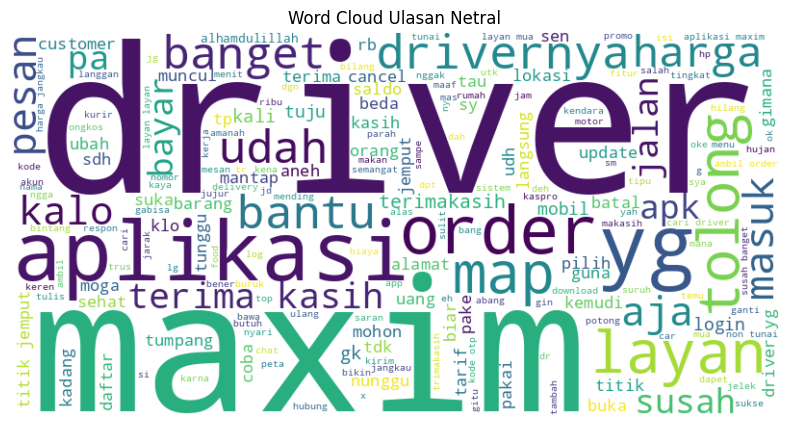

In [19]:
# Gabungkan semua teks ulasan netral
neutral_text = ' '.join(ulasan_maxim[ulasan_maxim['sentiment'] == 'Netral']['processed_content'])

# Buat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Ulasan Netral')
plt.show()

**Interpretasi Word Cloud Ulasan Netral**

Word cloud ulasan netral memberikan gambaran tentang pengalaman pengguna yang belum tentu positif atau negatif, tetapi mungkin menunjukkan area yang perlu ditingkatkan.

**1. Proses Pemesanan dan Penjemputan:**
- Kata "order", "map", "drivernya", "masuk", "nunggu", dan "pilih" mengindikasikan bahwa pengguna mungkin mengalami kesulitan atau ketidaknyamanan dalam proses pemesanan, menemukan lokasi penjemputan, atau menunggu pengemudi. Ini bisa menjadi area yang perlu dioptimalkan oleh Maxim untuk meningkatkan pengalaman pengguna.

**2. Permintaan Bantuan dan Dukungan:**
- Kata "tolong", "aja", "bantu", dan "aplikasi" menunjukkan bahwa pengguna mungkin mencari bantuan atau dukungan terkait penggunaan aplikasi atau layanan Maxim. Ini menunjukkan pentingnya menyediakan saluran komunikasi yang jelas dan responsif bagi pengguna yang membutuhkan bantuan.

**3. Sentimen Campuran:**
- Kata "banget" dan "suka" menunjukkan bahwa meskipun ulasan diklasifikasikan sebagai netral, pengguna mungkin masih memiliki beberapa aspek positif yang mereka hargai. Namun, keberadaan kata-kata seperti "nunggu" menunjukkan bahwa ada juga aspek yang kurang memuaskan.

**Kesimpulan:**
- Word cloud ulasan netral menunjukkan bahwa Maxim perlu memperhatikan pengalaman pengguna secara keseluruhan, terutama dalam hal proses pemesanan, waktu tunggu, dan dukungan pelanggan.
- Dengan mengatasi masalah-masalah ini, Maxim dapat meningkatkan kepuasan pengguna dan mengurangi jumlah ulasan netral.

## **3. Word Cloud Ulasan Negatif**

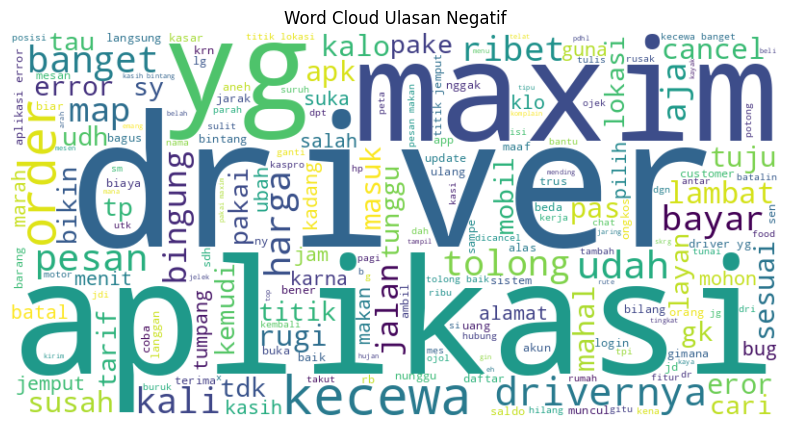

In [20]:
# Gabungkan semua teks ulasan negatif
negative_text = ' '.join(ulasan_maxim[ulasan_maxim['sentiment'] == 'Negatif']['processed_content'])

# Buat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Ulasan Negatif')
plt.show()

**Interpretasi Word Cloud Ulasan Negatif**

Word cloud ulasan negatif memberikan gambaran yang jelas tentang area-area yang perlu ditingkatkan oleh Maxim.

**1. Masalah Teknis dan Fungsionalitas Aplikasi:**
- Kata-kata seperti "aplikasi error", "apk error", "bug", "update", dan "error" menunjukkan bahwa pengguna sering mengalami masalah teknis dengan aplikasi Maxim. Ini bisa berupa crash, bug, atau kesalahan dalam fungsionalitas aplikasi.
- Maxim perlu memprioritaskan perbaikan bug dan peningkatan stabilitas aplikasi untuk memastikan pengalaman pengguna yang lancar.

**2. Kekecewaan dan Kebingungan dalam Pemesanan:**
- Kata "order", "kecewa", "bingung", "ribet", "cancel", "marah", dan "tunggu" menunjukkan bahwa pengguna sering mengalami kesulitan atau frustrasi dalam proses pemesanan.
- Ini bisa disebabkan oleh antarmuka aplikasi yang tidak intuitif, kurangnya informasi yang jelas, atau masalah dalam menemukan pengemudi. Maxim perlu menyederhanakan proses pemesanan dan memberikan panduan yang lebih baik kepada pengguna.

**3. Ketidakpuasan terhadap Tarif dan Biaya:**
- Kata "mahal", "tarif", dan "rugi" menunjukkan bahwa beberapa pengguna merasa harga yang ditawarkan oleh Maxim tidak kompetitif atau tidak sesuai dengan layanan yang diberikan.
- Maxim perlu mengevaluasi struktur harga mereka dan memastikan bahwa mereka menawarkan nilai yang baik kepada pelanggan.

**4. Masalah dengan Pengemudi dan Layanan:**
- Kata "salah terima" menunjukkan bahwa mungkin ada masalah dengan pengemudi yang menerima pesanan yang salah atau tidak muncul tepat waktu.
- Maxim perlu meningkatkan komunikasi antara pengemudi dan pelanggan serta memastikan bahwa pengemudi mematuhi standar layanan yang tinggi.

**5. Permohonan untuk Perbaikan:**
- Kata "mohon" menunjukkan bahwa pengguna secara aktif meminta Maxim untuk mengatasi masalah-masalah yang mereka hadapi.
- Ini menunjukkan bahwa pengguna masih memiliki harapan untuk perbaikan dan ingin terus menggunakan layanan Maxim jika masalah-masalah ini diselesaikan.

**Kesimpulan:**
- Word cloud ulasan negatif menunjukkan bahwa Maxim perlu mengambil tindakan segera untuk mengatasi masalah teknis, meningkatkan pengalaman pemesanan, mengevaluasi harga, dan memastikan kualitas layanan yang konsisten.
- Dengan mendengarkan umpan balik pengguna dan mengatasi masalah-masalah ini, Maxim dapat meningkatkan kepuasan pelanggan dan membangun reputasi yang lebih kuat.


# **J. Data Splitting dan Ekstraksi Fitur**

In [21]:
# Memisahkan fitur dan label
X = ulasan_maxim['processed_content']
y = ulasan_maxim['sentiment']

# Membagi dataset menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=2024)

In [22]:
# Ekstraksi fitur menggunakan TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Ekstraksi fitur menggunakan Count Vectorizer (BoW)
count_vectorizer = CountVectorizer(max_features=5000)
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)

In [23]:
# Konversi hasil ekstraksi fitur TF-IDF ke DataFrame
X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
X_test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Konversi hasil ekstraksi fitur BoW ke DataFrame
X_train_bow_df = pd.DataFrame(X_train_bow.toarray(), columns=count_vectorizer.get_feature_names_out())
X_test_bow_df = pd.DataFrame(X_test_bow.toarray(), columns=count_vectorizer.get_feature_names_out())

display(X_train_tfidf_df.head())
display(X_test_tfidf_df.head())

display(X_train_bow_df.head())
display(X_test_bow_df.head())

,aa,aamiin,aamin,abai,abal,abang,abg,abgnya,abng,abngnya,...,yusup,yuuk,yuzar,zaman,zebra,zona,zone,zonk,zoonk,zoos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,aa,aamiin,aamin,abai,abal,abang,abg,abgnya,abng,abngnya,...,yusup,yuuk,yuzar,zaman,zebra,zona,zone,zonk,zoonk,zoos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,aa,aamiin,aamin,abai,abal,abang,abg,abgnya,abng,abngnya,...,yusup,yuuk,yuzar,zaman,zebra,zona,zone,zonk,zoonk,zoos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,aa,aamiin,aamin,abai,abal,abang,abg,abgnya,abng,abngnya,...,yusup,yuuk,yuzar,zaman,zebra,zona,zone,zonk,zoonk,zoos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **K. Modeling**

In [49]:
# Skema 1: SVM dengan TF-IDF

# Inisialisasi model SVM
svm_tfidf_model = SVC(kernel='linear', C=1.0)

# Melatih model dengan data pelatihan
svm_tfidf_model.fit(X_train_tfidf, y_train)

# Melakukan prediksi pada data pengujian
y_pred_svm_tfidf = svm_tfidf_model.predict(X_test_tfidf)

print("Skema 1: SVM dengan TF-IDF\n")
print(f"Akurasi: {accuracy_score(y_test, y_pred_svm_tfidf)*100}%")
print("-"*100)
print(classification_report(y_test, y_pred_svm_tfidf))

Skema 1: SVM dengan TF-IDF

Akurasi: 97.27564102564102%
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

     Negatif       0.89      0.81      0.85       187
      Netral       0.95      0.99      0.97      1026
     Positif       0.99      0.98      0.98      1907

    accuracy                           0.97      3120
   macro avg       0.95      0.93      0.94      3120
weighted avg       0.97      0.97      0.97      3120



In [50]:
# Skema 2: SVM dengan Count Vectorizer

# Inisialisasi model SVM
svm_bow_model = SVC(kernel='linear')

# Melatih model dengan data pelatihan
svm_bow_model.fit(X_train_bow, y_train)

# Melakukan prediksi pada data pengujian
y_pred_svm_bow = svm_bow_model.predict(X_test_bow)

print("Skema 2: SVM dengan Count Vectorizer\n")
print(f"Akurasi: {accuracy_score(y_test, y_pred_svm_bow)*100}%")
print("-"*100)
print(classification_report(y_test, y_pred_svm_bow))

Skema 2: SVM dengan Count Vectorizer

Akurasi: 98.65384615384616%
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

     Negatif       0.93      0.90      0.92       187
      Netral       0.98      0.99      0.99      1026
     Positif       1.00      0.99      0.99      1907

    accuracy                           0.99      3120
   macro avg       0.97      0.96      0.97      3120
weighted avg       0.99      0.99      0.99      3120



In [51]:
# Skema 3: MLP Classifier dengan TF-IDF

# Inisialisasi model MLP Classifier
mlp_tfidf_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Melatih model dengan data pelatihan
mlp_tfidf_model.fit(X_train_tfidf, y_train)

# Melakukan prediksi pada data pengujian
y_pred_mlp_tfidf = mlp_tfidf_model.predict(X_test_tfidf)

# Evaluasi model
print("Skema 3: MLP Classifier dengan TF-IDF\n")
print(f"Akurasi: {accuracy_score(y_test, y_pred_mlp_tfidf)*100}%")
print("-"*100)
print(classification_report(y_test, y_pred_mlp_tfidf))

Skema 3: MLP Classifier dengan TF-IDF

Akurasi: 94.00641025641025%
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

     Negatif       0.83      0.67      0.74       187
      Netral       0.91      0.94      0.93      1026
     Positif       0.96      0.97      0.97      1907

    accuracy                           0.94      3120
   macro avg       0.90      0.86      0.88      3120
weighted avg       0.94      0.94      0.94      3120



In [52]:
# Skema 4: MLP Classifier dengan BoW

# Inisialisasi model MLP Classifier
mlp_bow_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Melatih model dengan data pelatihan
mlp_bow_model.fit(X_train_bow, y_train)

# Melakukan prediksi pada data pengujian
y_pred_mlp_bow = mlp_bow_model.predict(X_test_bow)

# Evaluasi model
print("Skema 4: MLP Classifier dengan BoW\n")
print(f"Akurasi: {accuracy_score(y_test, y_pred_mlp_bow)*100}%")
print("-"*100)
print(classification_report(y_test, y_pred_mlp_bow))

Skema 4: MLP Classifier dengan BoW

Akurasi: 97.01923076923077%
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

     Negatif       0.91      0.74      0.82       187
      Netral       0.96      0.98      0.97      1026
     Positif       0.98      0.99      0.99      1907

    accuracy                           0.97      3120
   macro avg       0.95      0.90      0.92      3120
weighted avg       0.97      0.97      0.97      3120



In [53]:
# Skema 5: Gradient Boosting Classifier dengan TF-IDF

# Inisialisasi model Gradient Boosting Classifier
gb_tfidf_model = GradientBoostingClassifier(random_state=42)

# Melatih model dengan data pelatihan
gb_tfidf_model.fit(X_train_tfidf, y_train)

# Melakukan prediksi pada data pengujian
y_pred_gb_tfidf = gb_tfidf_model.predict(X_test_tfidf)

# Evaluasi model
print("Skema 5: Gradient Boosting Classifier dengan TF-IDF\n")
print(f"Akurasi: {accuracy_score(y_test, y_pred_gb_tfidf)*100}%")
print("-"*100)
print(classification_report(y_test, y_pred_gb_tfidf))

Skema 5: Gradient Boosting Classifier dengan TF-IDF

Akurasi: 96.69871794871796%
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

     Negatif       0.92      0.83      0.87       187
      Netral       0.93      0.99      0.96      1026
     Positif       0.99      0.97      0.98      1907

    accuracy                           0.97      3120
   macro avg       0.95      0.93      0.94      3120
weighted avg       0.97      0.97      0.97      3120



In [54]:
# Skema 6: Gradient Boosting Classifier dengan BoW

# Inisialisasi model Gradient Boosting Classifier
gb_bow_model = GradientBoostingClassifier(random_state=42)

# Melatih model dengan data pelatihan
gb_bow_model.fit(X_train_bow, y_train)

# Melakukan prediksi pada data pengujian
y_pred_gb_bow = gb_bow_model.predict(X_test_bow)

# Evaluasi model
print("Skema 6: Gradient Boosting Classifier dengan BoW\n")
print(f"Akurasi: {accuracy_score(y_test, y_pred_gb_bow)*100}%")
print("-"*100)
print(classification_report(y_test, y_pred_gb_bow))

Skema 6: Gradient Boosting Classifier dengan BoW

Akurasi: 97.27564102564102%
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

     Negatif       0.93      0.87      0.90       187
      Netral       0.94      0.99      0.97      1026
     Positif       0.99      0.97      0.98      1907

    accuracy                           0.97      3120
   macro avg       0.96      0.94      0.95      3120
weighted avg       0.97      0.97      0.97      3120



In [55]:
# Menyimpan hasil evaluasi dalam dictionary
results = {
    'SVM (TF-IDF)': classification_report(y_test, y_pred_svm_tfidf, output_dict=True),
    'SVM (BoW)': classification_report(y_test, y_pred_svm_bow, output_dict=True),
    'MLP (TF-IDF)': classification_report(y_test, y_pred_mlp_tfidf, output_dict=True),
    'MLP (BoW)': classification_report(y_test, y_pred_mlp_bow, output_dict=True),
    'GB (TF-IDF)': classification_report(y_test, y_pred_gb_tfidf, output_dict=True),
    'GB (BoW)': classification_report(y_test, y_pred_gb_bow, output_dict=True)
}

# Membuat DataFrame dari hasil evaluasi
df_results = pd.DataFrame({
    'Model': results.keys(),
    'Accuracy': [result['accuracy'] for result in results.values()]
})

# Mengurutkan DataFrame berdasarkan accuracy secara menurun
df_results = df_results.sort_values(by='Accuracy', ascending=False)

# Menampilkan DataFrame
print(df_results)

          Model  Accuracy
1     SVM (BoW)  0.986538
0  SVM (TF-IDF)  0.972756
5      GB (BoW)  0.972756
3     MLP (BoW)  0.970192
4   GB (TF-IDF)  0.966987
2  MLP (TF-IDF)  0.940064


In [56]:
# Menampilkan model dengan accuracy terbaik
best_model = df_results.iloc[0]['Model']
best_accuracy = df_results.iloc[0]['Accuracy']

print(f"\nModel dengan akurasi terbaik: {best_model} dengan akurasi {best_accuracy*100}%")


Model dengan akurasi terbaik: SVM (BoW) dengan akurasi 98.65384615384616%


**Interpretasi Hasil Modeling dengan SVM (BoW)**

Model SVM (Support Vector Machine) dengan Count Vectorizer (BoW) memberikan hasil yang sangat baik dalam klasifikasi sentimen ulasan Maxim, mencapai akurasi sebesar 98.65%.

**1. Akurasi yang Tinggi:**
- Akurasi 98.65% menunjukkan bahwa model mampu memprediksi sentimen ulasan (positif, netral, atau negatif) dengan tingkat kesalahan yang sangat rendah. Ini berarti model telah belajar dengan baik pola-pola dalam data teks dan dapat menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya.

**2. Keunggulan SVM dengan BoW:**
- SVM dikenal sebagai algoritma yang kuat dan efektif untuk klasifikasi teks.
- BoW (Bag-of-Words) adalah metode representasi teks yang sederhana namun efektif, di mana teks diwakili sebagai vektor frekuensi kata.
- Kombinasi SVM dengan BoW terbukti sangat cocok untuk tugas klasifikasi sentimen dalam kasus ini.

**3. Implikasi untuk Maxim:**
- Model ini dapat digunakan oleh Maxim untuk secara otomatis menganalisis sentimen ulasan pengguna yang masuk, memberikan wawasan berharga tentang kepuasan pelanggan.
- Informasi ini dapat digunakan untuk:
    - Mengidentifikasi area-area yang perlu ditingkatkan dalam layanan mereka.
    - Memantau perubahan sentimen pelanggan dari waktu ke waktu.
    - Mengambil tindakan proaktif untuk mengatasi masalah sebelum mereka meningkat.

**4. Pertimbangan Lebih Lanjut:**
- Meskipun akurasi yang tinggi sangat menggembirakan, penting untuk diingat bahwa model ini masih memiliki keterbatasan.
- Evaluasi lebih lanjut pada dataset yang lebih besar dan beragam dapat memberikan gambaran yang lebih komprehensif tentang kinerja model.
- Selain itu, eksplorasi teknik pemrosesan teks dan model machine learning lainnya dapat mengarah pada peningkatan lebih lanjut dalam akurasi dan kemampuan generalisasi.


In [57]:
# Menyimpan model dan vectorizer terbaik

# Mengambil model dan vectorizer terbaik
if best_model == 'SVM (TF-IDF)':
  best_model_obj = svm_tfidf_model
  best_vectorizer = tfidf_vectorizer
elif best_model == 'SVM (BoW)':
  best_model_obj = svm_bow_model
  best_vectorizer = count_vectorizer
elif best_model == 'KNN (TF-IDF)':
  best_model_obj = knn_tfidf_model
  best_vectorizer = tfidf_vectorizer
elif best_model == 'KNN (BoW)':
  best_model_obj = knn_bow_model
  best_vectorizer = count_vectorizer
elif best_model == 'SGD (TF-IDF)':
  best_model_obj = sgd_tfidf_model
  best_vectorizer = tfidf_vectorizer
elif best_model == 'SGD (BoW)':
  best_model_obj = sgd_bow_model
  best_vectorizer = count_vectorizer
elif best_model == 'LDA (TF-IDF)':
  best_model_obj = lda_tfidf_model
  best_vectorizer = tfidf_vectorizer
elif best_model == 'LDA (BoW)':
  best_model_obj = lda_bow_model
  best_vectorizer = count_vectorizer

# Menyimpan model terbaik
joblib.dump(best_model_obj, 'best_model.pkl')

# Menyimpan vectorizer terbaik
joblib.dump(best_vectorizer, 'best_vectorizer.pkl')


['best_vectorizer.pkl']

# **L. Kesimpulan dan Rekomendasi**

## **1. Kesimpulan**

- Analisis sentimen ulasan Maxim menunjukkan bahwa sebagian besar pengguna merasa puas dengan layanan yang diberikan.
- Faktor-faktor seperti harga yang terjangkau, kecepatan layanan, dan keramahan pengemudi menjadi poin positif yang sering disoroti.
- Namun, terdapat juga beberapa area yang perlu ditingkatkan, termasuk stabilitas aplikasi, proses pemesanan, dan penanganan masalah teknis.
- Model SVM dengan Count Vectorizer (BoW) terbukti sangat efektif dalam mengklasifikasikan sentimen ulasan, mencapai akurasi 98.65%.
- Model ini dapat digunakan oleh Maxim untuk memantau sentimen pelanggan secara otomatis dan mengambil tindakan yang diperlukan untuk meningkatkan layanan.

## **2. Rekomendasi**

- **Peningkatan Aplikasi:** Prioritaskan perbaikan bug dan peningkatan stabilitas aplikasi untuk memastikan pengalaman pengguna yang lancar.
- **Optimalisasi Pemesanan:** Sederhanakan proses pemesanan dan berikan panduan yang lebih jelas kepada pengguna.
- **Peningkatan Komunikasi:** Tingkatkan komunikasi antara pengemudi dan pelanggan, serta pastikan pengemudi mematuhi standar layanan yang tinggi.
- **Evaluasi Harga:** Tinjau struktur harga dan pastikan bahwa Maxim menawarkan nilai yang baik kepada pelanggan.
- **Pemantauan Sentimen:** Gunakan model SVM (BoW) untuk memantau sentimen pelanggan secara otomatis dan identifikasi area yang perlu ditingkatkan.
- **Responsif terhadap Umpan Balik:** Tanggapi umpan balik pengguna dengan serius dan ambil tindakan yang diperlukan untuk mengatasi masalah yang diangkat.

Dengan mengatasi masalah yang diidentifikasi dan terus meningkatkan layanan, Maxim dapat memperkuat posisinya sebagai penyedia layanan transportasi yang andal dan memuaskan pelanggan.